In [57]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [58]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Dataset info

In [59]:
data.target[404]

np.int64(1)

In [60]:
data.target.shape

(569,)

In [61]:
data.data[404]

array([1.234e+01, 1.495e+01, 7.829e+01, 4.691e+02, 8.682e-02, 4.571e-02,
       2.109e-02, 2.054e-02, 1.571e-01, 5.708e-02, 3.833e-01, 9.078e-01,
       2.602e+00, 3.015e+01, 7.702e-03, 8.491e-03, 1.307e-02, 1.030e-02,
       2.970e-02, 1.432e-03, 1.318e+01, 1.685e+01, 8.411e+01, 5.331e+02,
       1.048e-01, 6.744e-02, 4.921e-02, 4.793e-02, 2.298e-01, 5.974e-02])

In [62]:
data.data.shape

(569, 30)

#Preprocessing

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.2)
print(f"feature=> train:{x_train.shape} - test:{x_test.shape}")
print(f"lable=> train:{y_train.shape} - test:{y_test.shape}")

feature=> train:(455, 30) - test:(114, 30)
lable=> train:(455,) - test:(114,)


In [64]:
x_train[0]

array([1.149e+01, 1.459e+01, 7.399e+01, 4.049e+02, 1.046e-01, 8.228e-02,
       5.308e-02, 1.969e-02, 1.779e-01, 6.574e-02, 2.034e-01, 1.166e+00,
       1.567e+00, 1.434e+01, 4.957e-03, 2.114e-02, 4.156e-02, 8.038e-03,
       1.843e-02, 3.614e-03, 1.240e+01, 2.190e+01, 8.204e+01, 4.676e+02,
       1.352e-01, 2.010e-01, 2.596e-01, 7.431e-02, 2.941e-01, 9.180e-02])

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test =scaler.transform(x_test)


In [66]:
x_train[0]

array([0.18605221, 0.16503213, 0.18300514, 0.10070429, 0.41718704,
       0.19293295, 0.12436739, 0.09786282, 0.36313131, 0.33235046,
       0.03226274, 0.17773995, 0.03816614, 0.01452974, 0.11027637,
       0.14185718, 0.10494949, 0.15226369, 0.14842123, 0.09394304,
       0.15221659, 0.26332623, 0.15759968, 0.08105235, 0.42283563,
       0.16853431, 0.23493213, 0.25597658, 0.2712399 , 0.24111242])

classification


In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_metrics(y_train, y_test , y_pred_train, y_pred_test):
    accuracy_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
    accuracy_test =accuracy_score(y_true=y_test,y_pred=y_pred_test)

    precision = precision_score(y_true=y_test,y_pred=y_pred_test)
    recall = recall_score(y_true=y_test,y_pred=y_pred_test)
    f1 = f1_score(y_true=y_test,y_pred=y_pred_test)
    matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
    print(f"accuracy_train:{accuracy_train} - accuracy_test:{accuracy_test} - precision:{precision} - recall:{recall} - f1-score:{f1} ")



   
    plt.figure(figsize=(6,5))  
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


    
    return precision , recall, accuracy_test, accuracy_train, f1
    


GaussianNB

In [68]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

accuracy_train:0.9362637362637363 - accuracy_test:0.9473684210526315 - precision:0.9714285714285714 - recall:0.9444444444444444 - f1-score:0.9577464788732394 


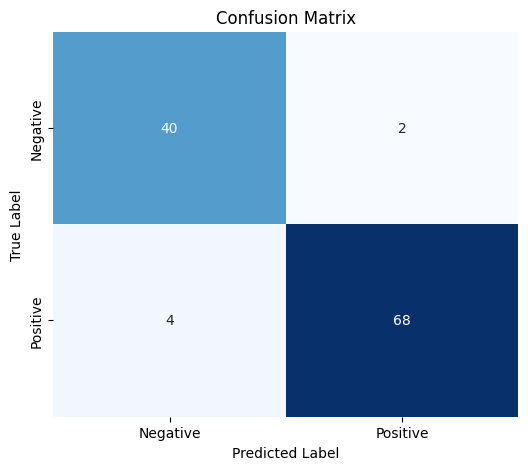

In [69]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

precision_gnb , recall_gnb, accuracy_test_gnb, accuracy_train_gnb, f1_gnb = calculate_metrics(y_train, y_test , y_pred_train, y_pred_test)

KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

accuracy_train:0.978021978021978 - accuracy_test:0.9912280701754386 - precision:0.9863013698630136 - recall:1.0 - f1-score:0.993103448275862 


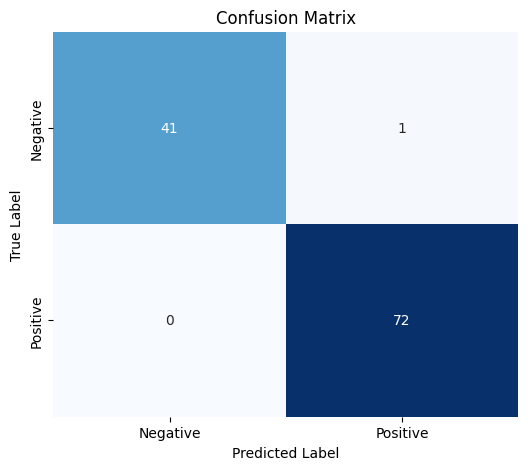

In [71]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

precision_knn , recall_knn, accuracy_test_knn, accuracy_train_knn, f1_knn = calculate_metrics(y_train, y_test , y_pred_train, y_pred_test)

decision tree


In [72]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

accuracy_train:1.0 - accuracy_test:0.9736842105263158 - precision:0.9726027397260274 - recall:0.9861111111111112 - f1-score:0.9793103448275862 


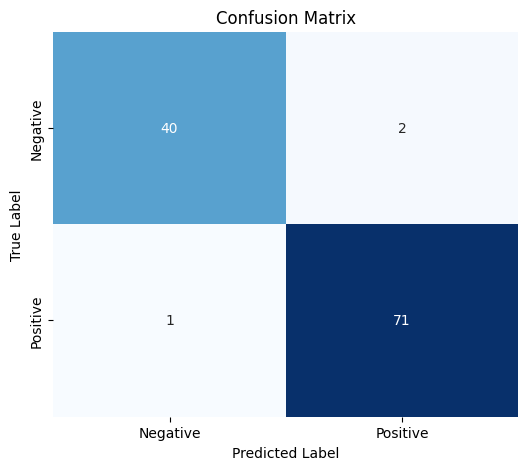

In [73]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

precision_dt , recall_dt, accuracy_test_dt, accuracy_train_dt, f1_dt = calculate_metrics(y_train, y_test , y_pred_train, y_pred_test)

Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=7)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=50)

accuracy_train:1.0 - accuracy_test:0.9824561403508771 - precision:0.9861111111111112 - recall:0.9861111111111112 - f1-score:0.9861111111111112 


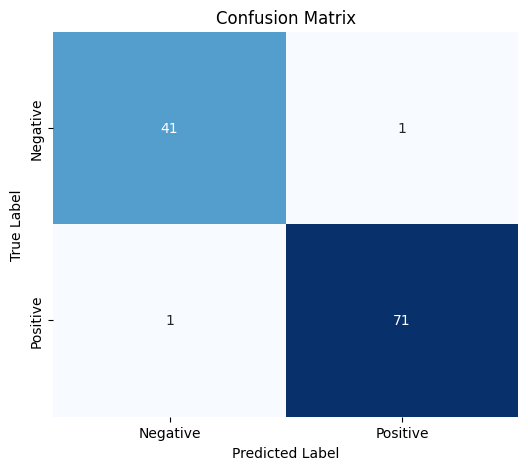

In [75]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

precision_rf , recall_rf, accuracy_test_rf, accuracy_train_rf, f1_rf = calculate_metrics(y_train, y_test , y_pred_train, y_pred_test)

SVM

In [76]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)


SVC()

accuracy_train:0.9824175824175824 - accuracy_test:0.9912280701754386 - precision:0.9863013698630136 - recall:1.0 - f1-score:0.993103448275862 


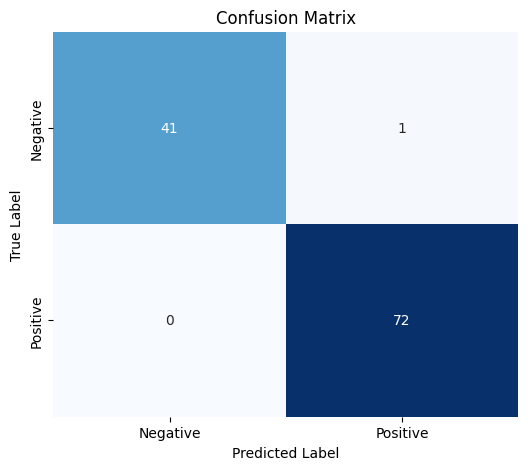

In [77]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

precision_svm , recall_svm, accuracy_test_svm, accuracy_train_svm, f1_svm = calculate_metrics(y_train, y_test , y_pred_train, y_pred_test)

Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

accuracy_train:0.967032967032967 - accuracy_test:0.9912280701754386 - precision:0.9863013698630136 - recall:1.0 - f1-score:0.993103448275862 


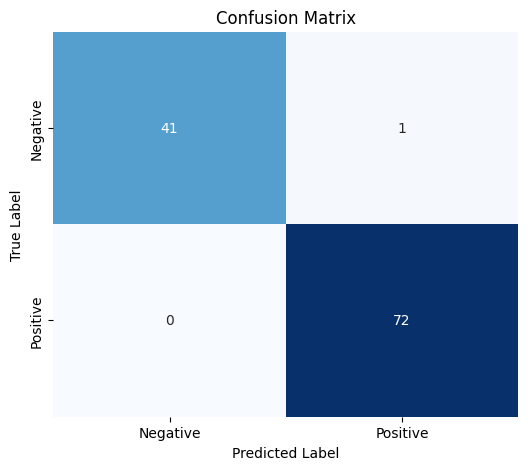

In [79]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

precision_lr , recall_lr, accuracy_test_lr, accuracy_train_lr, f1_lr = calculate_metrics(y_train, y_test , y_pred_train, y_pred_test)

ANN

In [80]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=1024, activation='relu', solver='adam',batch_size=64)
ann.fit(x_train, y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=1024)

accuracy_train:0.9846153846153847 - accuracy_test:0.9824561403508771 - precision:0.9861111111111112 - recall:0.9861111111111112 - f1-score:0.9861111111111112 


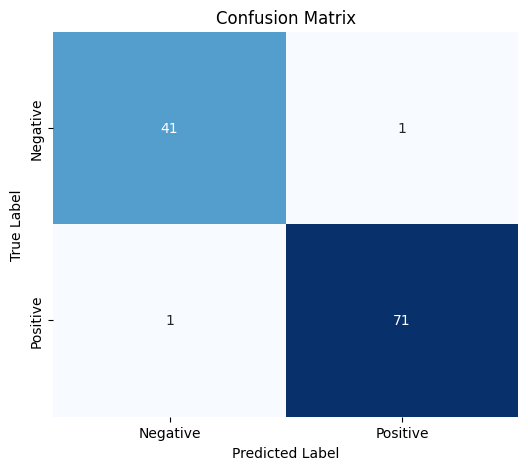

In [81]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

precision_ann , recall_ann, accuracy_test_ann, accuracy_train_ann, f1_ann = calculate_metrics(y_train, y_test , y_pred_train, y_pred_test)


comparison

accuracy_train


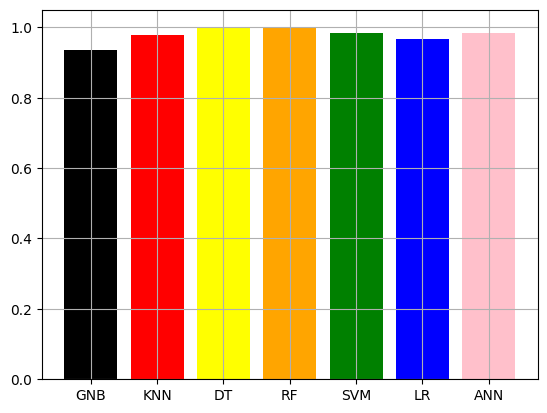

In [82]:
import matplotlib.pyplot as plt
accuracy_train =[accuracy_train_gnb, accuracy_train_knn, accuracy_train_dt, accuracy_train_rf, accuracy_train_svm, accuracy_train_lr, accuracy_train_ann]
title = ['GNB', 'KNN','DT' ,'RF','SVM','LR','ANN' ]
colors =['black','red', 'yellow','orange', 'green','blue','pink']
plt.bar(title, accuracy_train, color =colors)
plt.grid()
plt.show()

accuracy_test

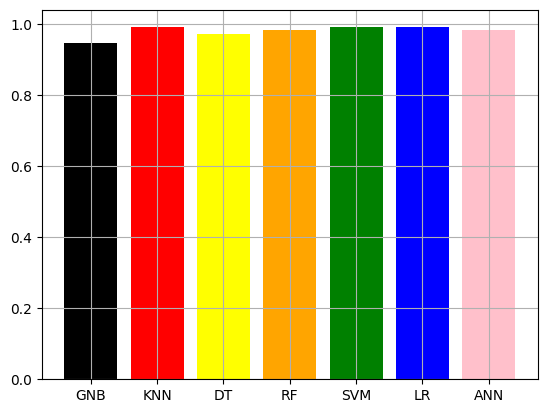

In [83]:

accuracy_test =[accuracy_test_gnb, accuracy_test_knn, accuracy_test_dt, accuracy_test_rf, accuracy_test_svm, accuracy_test_lr, accuracy_test_ann]
title = ['GNB', 'KNN','DT' ,'RF','SVM','LR','ANN' ]
colors =['black','red', 'yellow','orange', 'green','blue','pink']
plt.bar(title, accuracy_test, color =colors)
plt.grid()
plt.show()

precision


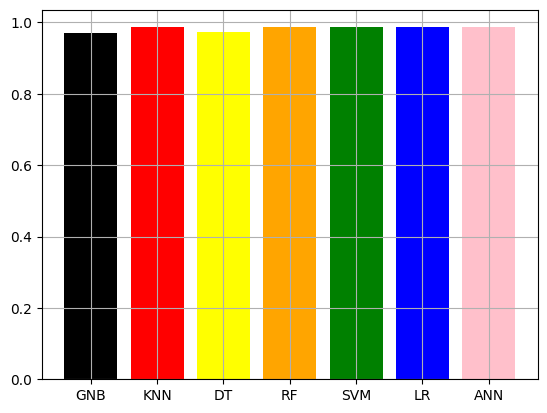

In [84]:

precision =[precision_gnb, precision_knn, precision_dt, precision_rf, precision_svm, precision_lr, precision_ann]
title = ['GNB', 'KNN','DT' ,'RF','SVM','LR','ANN' ]
colors =['black','red', 'yellow','orange', 'green','blue','pink']
plt.bar(title, precision, color =colors)
plt.grid()
plt.show()

recall


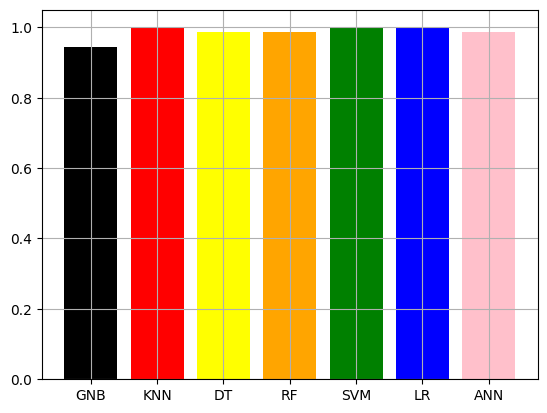

In [85]:

recall =[recall_gnb, recall_knn, recall_dt, recall_rf, recall_svm, recall_lr, recall_ann]
title = ['GNB', 'KNN','DT' ,'RF','SVM','LR','ANN' ]
colors =['black','red', 'yellow','orange', 'green','blue','pink']
plt.bar(title, recall, color =colors)
plt.grid()
plt.show()

f1_score

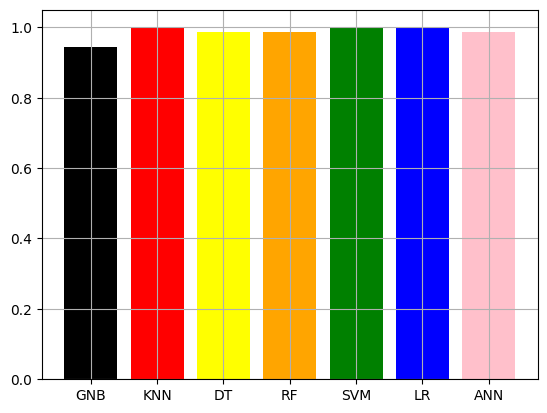

In [86]:
f1_score =[recall_gnb, recall_knn, recall_dt, recall_rf, recall_svm, recall_lr, recall_ann]
title = ['GNB', 'KNN','DT' ,'RF','SVM','LR','ANN' ]
colors =['black','red', 'yellow','orange', 'green','blue','pink']
plt.bar(title, recall, color =colors)
plt.grid()
plt.show()